<a href="https://colab.research.google.com/github/XANDOOM/Loan-Approval-Classification-Project/blob/main/Final_Copy_of_Working_Final_Model_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset into a Pandas Dataframe



In [3]:
import kagglehub
import pandas as pd
import os

#Download dataset from Kaggle
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")
print("Dataset folder:", path)

#Construct file path for loading into a dataframe
filename = "loan_data.csv"
full_file_path = os.path.join(path, filename)

#Load into Pandas
df = pd.read_csv(full_file_path)

#Verify
print(f"Loaded dataset with {df.shape[0]} rows")
print(df.head())

Using Colab cache for faster access to the 'loan-approval-classification-data' dataset.
Dataset folder: /kaggle/input/loan-approval-classification-data
Loaded dataset with 45000 rows
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                

## Data Exploration and Preprocessing


In [4]:
#Displaying the first few rows of the DataFrame to check its information
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame information (data types, non-null counts):")
df.info()

#Generating descriptive statistics for numerical columns to understand the data structure
#and content as part of the initial data exploration.
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

Displaying the first 5 rows of the DataFrame:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.

In [5]:
#Identifying categorical columns and numerical colums

print("\nUnique values and their counts for categorical columns:")
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Excluding 'loan_status' from numerical columns as it's the target variable and doesn't need scaling
if 'loan_status' in numerical_cols:
    numerical_cols = numerical_cols.drop('loan_status')

print(f"Identified Numerical Columns: {list(numerical_cols)}")
print(f"Identified Categorical Columns: {list(categorical_cols)}")

#Examining unique categorical values and counts to understand their distribution
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

#Displaying the target variable distribution
print("\n--- loan_status ---")
print(df['loan_status'].value_counts())


Unique values and their counts for categorical columns:
Identified Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
Identified Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

--- person_gender ---
person_gender
male      24841
female    20159
Name: count, dtype: int64

--- person_education ---
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

--- person_home_ownership ---
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

--- loan_intent ---
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count

###Handle Missing Values

In [6]:
print("Checking for missing values:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

#Filtering to show only columns with missing values
missing_info = missing_info[missing_info['Missing Count'] > 0]

if missing_info.empty:
    print("No missing values found in the dataset.")
else:
    print(missing_info.sort_values(by='Missing Count', ascending=False))

Checking for missing values:
No missing values found in the dataset.


### Encode Categorical Features

In [7]:
from sklearn.preprocessing import OneHotEncoder

#Initialise OneHotEncoder
#handle_unknown='ignore' will set the encoded columns to all zeros for unseen categories during transform.
#sparse_output=False ensures a dense array output instead of a sparse matrix.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df[categorical_cols])

#Create a DataFrame from the encoded features with appropriate column names
#Generating descriptive names for the new columns
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

#Concatenate the one-hot encoded features back into the original DataFrame
#and drop the original categorical columns
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print("DataFrame after One-Hot Encoding:")
print(df.head())
print(f"New DataFrame shape: {df.shape}")
print(f"New DataFrame columns: {df.columns.tolist()}")

DataFrame after One-Hot Encoding:
   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0        71948.0               0    35000.0          16.02   
1        21.0        12282.0               0     1000.0          11.14   
2        25.0        12438.0               3     5500.0          12.87   
3        23.0        79753.0               0    35000.0          15.23   
4        24.0        66135.0               1    35000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.49                         3.0           561            1   
1                 0.08                         2.0           504            0   
2                 0.44                         3.0           635            1   
3                 0.44                         2.0           675            1   
4                 0.53                         4.0           586            1   

   person_gender_female  ...  pers

### Scale Numerical Features

In [8]:
from sklearn.preprocessing import StandardScaler

#'numerical_cols' was already defined and excludes 'loan_status' from previous steps

#Initialize StandardScaler
scaler = StandardScaler()

#Fit the scaler to the numerical data and transform it
scaled_features = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols, index=df.index)

#Replace the original numerical columns with the scaled versions in the DataFrame
df[numerical_cols] = scaled_df

print("DataFrame after Numerical Feature Scaling:")
print(df.head())
print(f"New DataFrame shape: {df.shape}")
print(f"New DataFrame columns: {df.columns.tolist()}")

DataFrame after Numerical Feature Scaling:
   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -0.953538      -0.104090       -0.892284   4.024953       1.683039   
1   -1.118963      -0.846005       -0.892284  -1.359209       0.044782   
2   -0.457264      -0.844065       -0.397517  -0.646600       0.625557   
3   -0.788113      -0.007039       -0.892284   4.024953       1.417829   
4   -0.622689      -0.176371       -0.727362   4.024953       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0             4.016394                   -0.739109     -1.419814            1   
1            -0.684829                   -0.996863     -2.549975            0   
2             3.443074                   -0.739109      0.047412            1   
3             3.443074                   -0.996863      0.840507            1   
4             4.475050                   -0.481354     -0.924130            1   

   person_gender_female  

## Data Visualisation


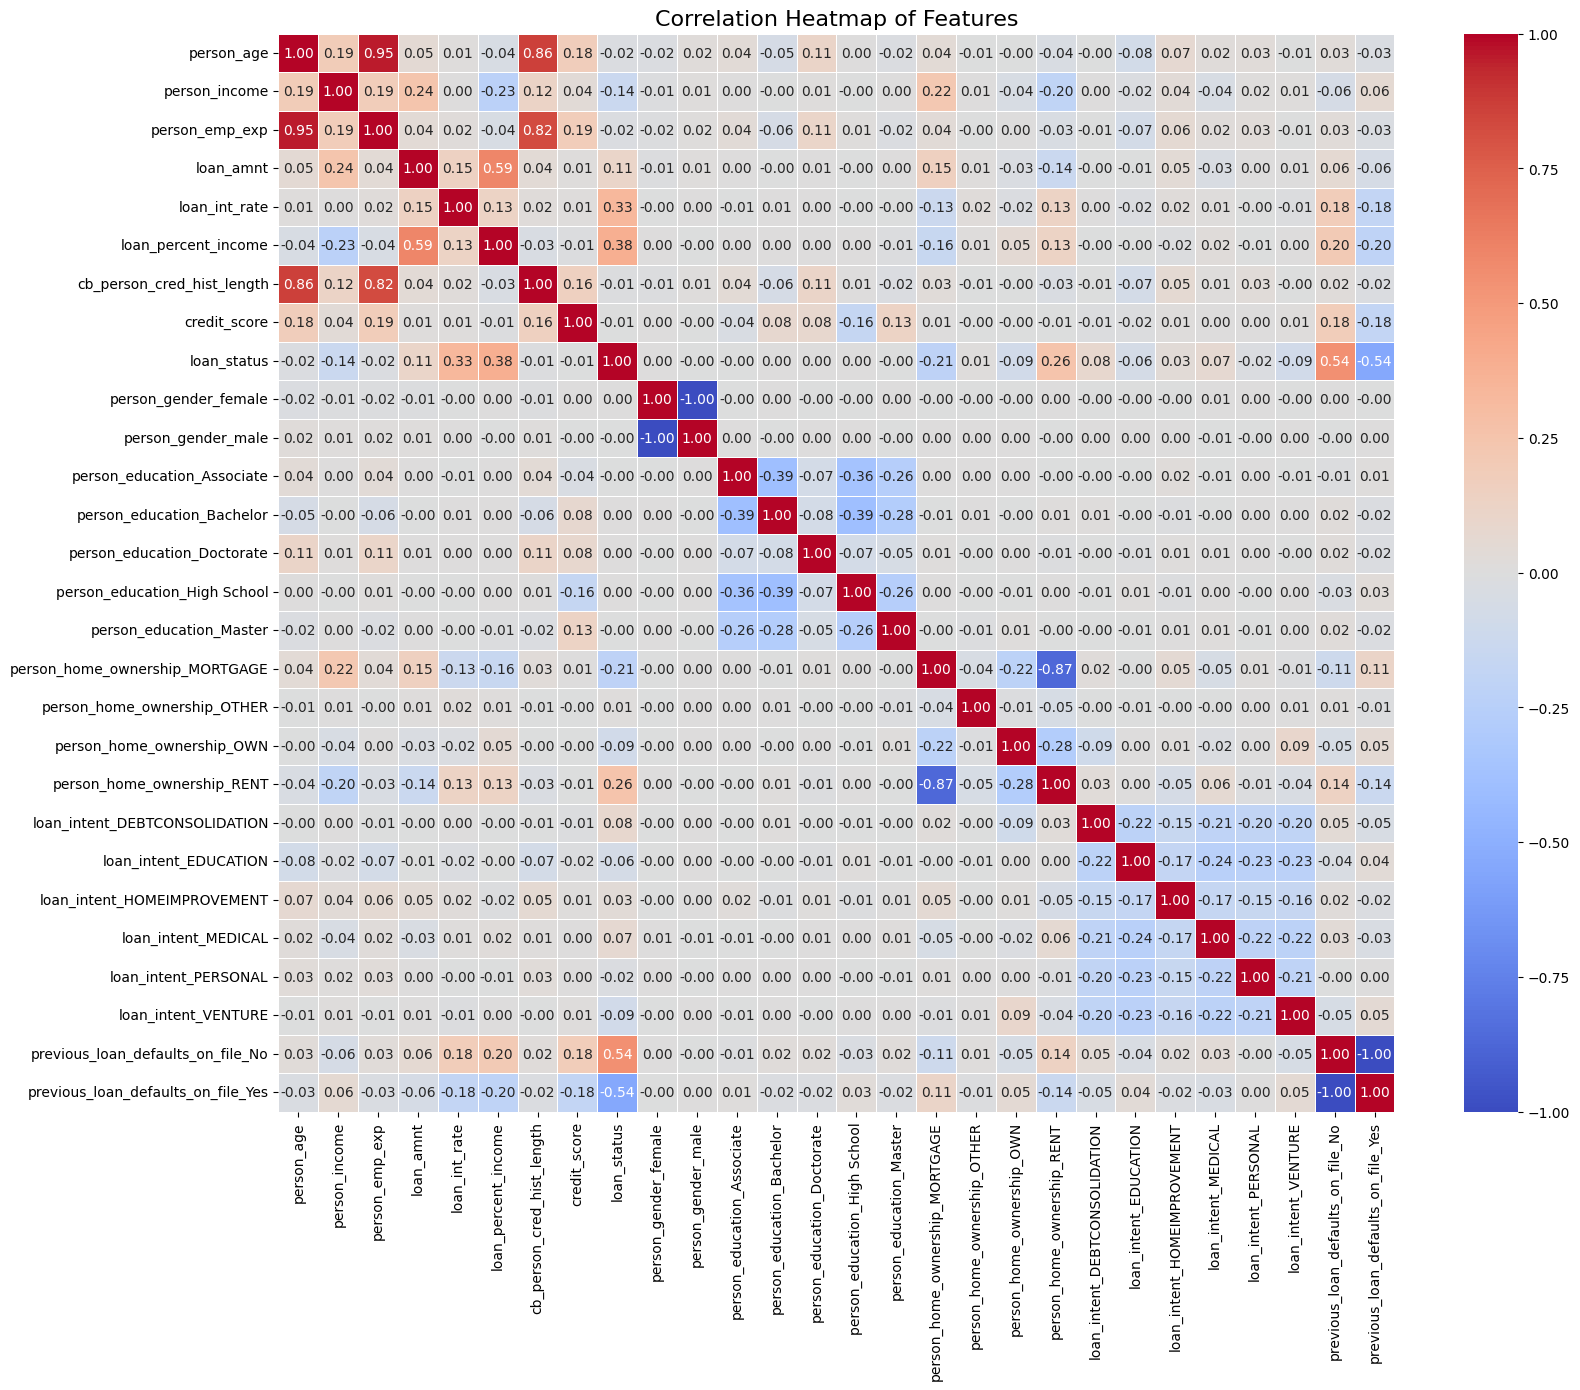

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create a correlation matrix for all numerical columns including 'loan_status'
correlation_matrix = df.corr()

#Set the figure size for better readability
plt.figure(figsize=(18, 14))

#Generate a heatmap of the correlation matrix
#annot=True displays the correlation values on the heatmap cells.
#cmap='coolwarm' sets the color scheme, making positive correlations red and negative correlations blue.
#fmt='.2f' formats the annotations to two decimal places.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

#Add a title to the heatmap
plt.title('Correlation Heatmap of Features', fontsize=16)

#Display the plot
plt.show()


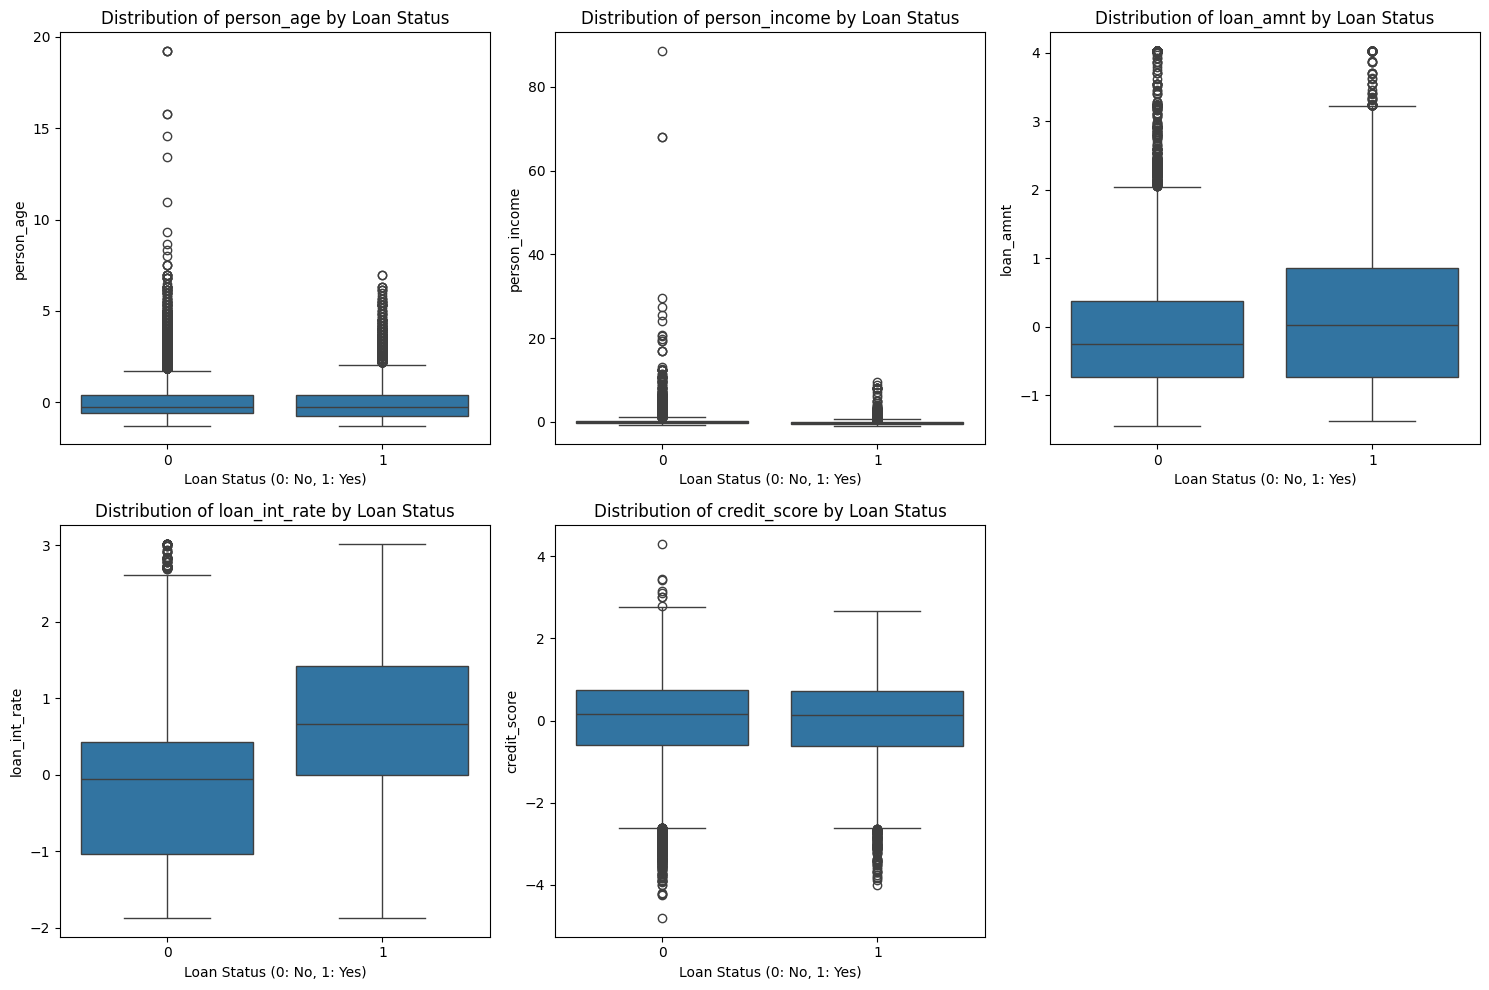

In [10]:
key_numerical_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'credit_score']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_numerical_features):
    #Adjust subplot grid based on number of features
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='loan_status', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel('Loan Status (0: No, 1: Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## Model Training and Hyperparameter Tuning


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Separate input features (X) and target variable (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

#Split data into training and testing sets
#stratify=y ensures that both training and testing sets have a similar proportion of the target variable as the original dataset.
#random_state is set for reproducibility, using 42 as thats the one I've seen used most commonly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

#Initialise Random Forest Classifier with balanced class weights
#class_weight='balanced' automatically adjusts weights inversely proportional to class frequencies.
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

#Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, None],      # Maximum depth of the tree (None means unlimited)
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

#Initialise GridSearchCV
#cv=3 for 3-fold cross-validation (as per the best practices I could find online)
#scoring='f1' is chosen as it's a good metric for imbalanced datasets, considering both precision and recall.
#A false positive would lead to loan defaults and a false negative would lead to opportunity loss
#n_jobs=-1 uses all available processors for parallel computation, speeding up the process.
#I have used the T4 GPU in Google Colab to run this which is capable to parallel computation
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
#Verbose output shows progress during fitting, I am using this like a loading bar while waiting for the training
)

#Fit the GridSearchCV object to the training data
print("\nStarting GridSearchCV for Random Forest Classifier...")
grid_search.fit(X_train, y_train)

#Print the best parameters found by the tuning process
print("\nGridSearchCV complete.")
print(f"Best parameters found: {grid_search.best_params_}")

Shape of features (X): (45000, 27)
Shape of target (y): (45000,)
Shape of X_train: (36000, 27)
Shape of X_test: (9000, 27)
Shape of y_train: (36000,)
Shape of y_test: (9000,)

Starting GridSearchCV for Random Forest Classifier...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

GridSearchCV complete.
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 300}


## Model Evaluation and Persistence

Best model found: RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=300, random_state=42)
Predictions made on the test set.
Confusion Matrix calculated.


<Figure size 800x600 with 0 Axes>

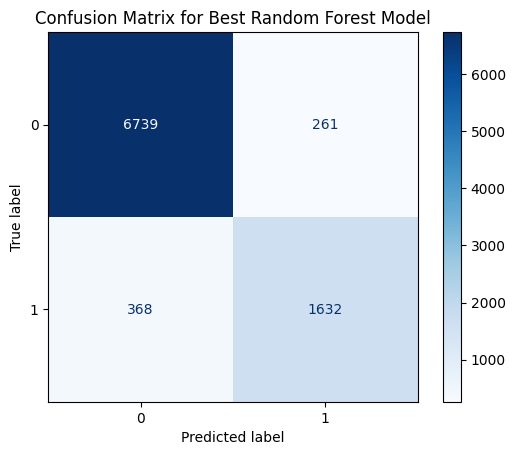

Model saved to best_random_forest_model.joblib
Model successfully loaded back from best_random_forest_model.joblib
Loaded model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

#Retrieve the best estimator from the grid_search object
best_model = grid_search.best_estimator_
print(f"Best model found: {best_model}")

#Use the best_model to make predictions on the X_test data
y_pred = best_model.predict(X_test)
print("Predictions made on the test set.")

#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix calculated.")

#Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues', values_format='d')
disp.ax_.set_title('Confusion Matrix for Best Random Forest Model')
plt.show()

#Save the trained model to a file (So I can download and use the model in the future without training again)
model_filename = 'best_random_forest_model.joblib'
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

#Load the saved model back into a new variable
loaded_model = joblib.load(model_filename)

#Print a confirmation message
print(f"Model successfully loaded back from {model_filename}")
print(f"Loaded model type: {type(loaded_model)}")

In [13]:
#Load the saved model back into a new variable
#Run only this code to load the model in the future when Colab runtime resets
loaded_model = joblib.load(model_filename)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
# 'pos_label=1' specifies that we are interested in the precision of the positive class (loan_status=1).
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision: {precision:.4f}")

# Calculate recall
# 'pos_label=1' specifies that we are interested in the recall of the positive class (loan_status=1).
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall: {recall:.4f}")

# Calculate F1-score
# 'pos_label=1' specifies that we are interested in the F1-score of the positive class (loan_status=1).
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9301
Precision: 0.8621
Recall: 0.8160
F1-Score: 0.8384


## Identify Misclassified Samples


In [15]:
#Convert the y_test Series to a NumPy array
y_test_np = y_test.to_numpy()

#Identify the indices where the y_pred array does not match the y_test array.
misclassified_indices = (y_pred != y_test_np)

#Using the misclassified_indices, filter X_test to get the features of the misclassified samples.
misclassified_X_test = X_test[misclassified_indices]

#Create a Series containing the actual y_test values for the misclassified samples
actual_loan_status = y_test[misclassified_indices].rename('actual_loan_status')

#Create a Series containing the y_pred values for the misclassified samples
predicted_loan_status = pd.Series(y_pred[misclassified_indices], index=misclassified_X_test.index).rename('predicted_loan_status')

#Concatenate the misclassified_X_test DataFrame with the 'actual_loan_status' and 'predicted_loan_status' Series
misclassified_samples_df = pd.concat([misclassified_X_test, actual_loan_status, predicted_loan_status], axis=1)

#Print the shape and the first 5 rows of misclassified_samples_df to verify the result.
print(f"Shape of misclassified_samples_df: {misclassified_samples_df.shape}")
print("First 5 rows of misclassified_samples_df:")
print(misclassified_samples_df.head())

Shape of misclassified_samples_df: (629, 29)
First 5 rows of misclassified_samples_df:
       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
24164   -0.126414      -0.346388       -0.067673   0.066010       0.998194   
7709    -0.457264      -0.535939       -0.727362  -0.409063      -0.129787   
10222   -0.457264      -0.255430       -0.727362   0.002667      -1.173840   
24814    0.535285       0.176830        1.251705   0.066010       1.095549   
15275   -0.291839       0.742785        0.097249  -0.725778       0.001139   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
24164             0.576474                    0.807419      0.662061   
7709              0.576474                   -0.739109      0.424132   
10222             0.232483                   -0.996863     -0.963784   
24814            -0.340837                    1.065174      1.514638   
15275            -1.143485                   -0.739109      0.404305   

       pers

In [16]:
import numpy as np

#Select 5 distinct misclassified samples for detailed analysis
#Using .iloc to select by integer position to ensure distinct samples if indices are not unique
num_samples_to_display = 5

#To ensure variety, we can try to select a mix of False Positives (FP) and False Negatives (FN)
#FP: actual_loan_status = 0, predicted_loan_status = 1
#FN: actual_loan_status = 1, predicted_loan_status = 0

fp_samples = misclassified_samples_df[(misclassified_samples_df['actual_loan_status'] == 0) & (misclassified_samples_df['predicted_loan_status'] == 1)]
fn_samples = misclassified_samples_df[(misclassified_samples_df['actual_loan_status'] == 1) & (misclassified_samples_df['predicted_loan_status'] == 0)]

selected_misclassified_samples = pd.DataFrame()

#Try to get 3 FP and 2 FN, or adjust based on availability
if not fp_samples.empty:
    selected_misclassified_samples = pd.concat([selected_misclassified_samples, fp_samples.head(min(3, len(fp_samples)))])

if not fn_samples.empty and len(selected_misclassified_samples) < num_samples_to_display:
    remaining_needed = num_samples_to_display - len(selected_misclassified_samples)
    selected_misclassified_samples = pd.concat([selected_misclassified_samples, fn_samples.head(min(remaining_needed, len(fn_samples)))])

#If still less than num_samples_to_display, just take from the top of the overall misclassified list
if len(selected_misclassified_samples) < num_samples_to_display:
    remaining_needed = num_samples_to_display - len(selected_misclassified_samples)
    #Get indices that are not already in selected_misclassified_samples
    current_indices = selected_misclassified_samples.index.tolist()
    additional_samples = misclassified_samples_df.loc[~misclassified_samples_df.index.isin(current_indices)].head(remaining_needed)
    selected_misclassified_samples = pd.concat([selected_misclassified_samples, additional_samples])

print(f"Selected {len(selected_misclassified_samples)} distinct misclassified samples:")
print(selected_misclassified_samples.head(num_samples_to_display))

#Display each selected sample's features, actual loan_status, and predicted loan_status
for i, (index, row) in enumerate(selected_misclassified_samples.iterrows()):
    print(f"\n--- Misclassified Sample {i+1} (Original Index: {index}) ---")
    print(f"Actual loan_status: {int(row['actual_loan_status'])}")
    print(f"Predicted loan_status: {int(row['predicted_loan_status'])}")
    print("Features:")
    print(row.drop(['actual_loan_status', 'predicted_loan_status']))

Selected 5 distinct misclassified samples:
       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
24164   -0.126414      -0.346388       -0.067673   0.066010       0.998194   
7709    -0.457264      -0.535939       -0.727362  -0.409063      -0.129787   
22779    1.196985      -0.490640        0.921860  -0.314048       1.431257   
10222   -0.457264      -0.255430       -0.727362   0.002667      -1.173840   
24814    0.535285       0.176830        1.251705   0.066010       1.095549   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
24164             0.576474                    0.807419      0.662061   
7709              0.576474                   -0.739109      0.424132   
22779             0.576474                    0.034155     -0.170689   
10222             0.232483                   -0.996863     -0.963784   
24814            -0.340837                    1.065174      1.514638   

       person_gender_female  person_gender_male  ...  \

--------------------------



--------------------------

##Compressing joblib file

In [17]:
import joblib

#Save with maximum compression as only 25mb file upload allowed in GitHub
joblib.dump(best_model, 'compressed_model.joblib', compress=9)

#Check the new size
compressed_size = os.path.getsize('compressed_model.joblib') / (1024 * 1024)
print(f"Compressed file size: {compressed_size:.2f} MB")

if compressed_size < 25:
    print("Success! The file is now under 25MB and ready for GitHub.")
else:
    print("Warning: The file is still over 25MB. May need to use the 'Push via Colab' method.")

Compressed file size: 20.41 MB
Success! The file is now under 25MB and ready for GitHub.


In [18]:
#Saving these so the app can use them to transform user input
joblib.dump(encoder, 'encoder.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']